<a href="https://colab.research.google.com/github/RanojoyBiswas/PySpark-Practice/blob/main/Logistic_Regression_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Consulting Project

## Binary Customer Churn

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

The data is saved as customer_churn.csv. Here are the fields and their definitions:

    Name : Name of the latest contact at Company
    Age: Customer Age
    Total_Purchase: Total Ads Purchased
    Account_Manager: Binary 0=No manager, 1= Account manager assigned
    Years: Totaly Years as a customer
    Num_sites: Number of websites that use the service.
    Onboard_date: Date that the name of the latest contact was onboarded
    Location: Client HQ Address
    Company: Name of Client Company
    
Once you've created the model and evaluated it, test out the model on some new data (you can think of this almost like a hold-out set) that your client has provided, saved under new_customers.csv. The client wants to know which customers are most likely to churn given this data (they don't have the label yet).

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=8616d87a60e7badef1dcb5e1c670ec2d87e4a2671819efbbb9f9c931600f9d6e
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('Logistic_project').getOrCreate()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = spark.read.csv('/content/drive/MyDrive/Pyspark Practice/Python-and-Spark-for-Big-Data-master/Spark_for_Machine_Learning/Logistic_Regression/customer_churn.csv',
                    inferSchema = True, header = True)

In [8]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [11]:
df.describe().show()

+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|summary|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|            Location|             Company|              Churn|
+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|  count|          900|              900|              900|               900|              900|               900|                 900|                 900|                900|
|   mean|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|                null|                null|0.16666666666666666|
| stddev|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.764835592035

In [10]:
df.columns

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

+----+-----+
| Age|count|
+----+-----+
|49.0|   30|
|29.0|    9|
|47.0|   29|
|42.0|   49|
|44.0|   53|
|35.0|   32|
|39.0|   48|
|37.0|   48|
|34.0|   25|
|25.0|    1|
|36.0|   39|
|41.0|   69|
|56.0|    5|
|50.0|   15|
|45.0|   56|
|31.0|   11|
|58.0|    2|
|51.0|   21|
|48.0|   36|
|22.0|    1|
+----+-----+
only showing top 20 rows



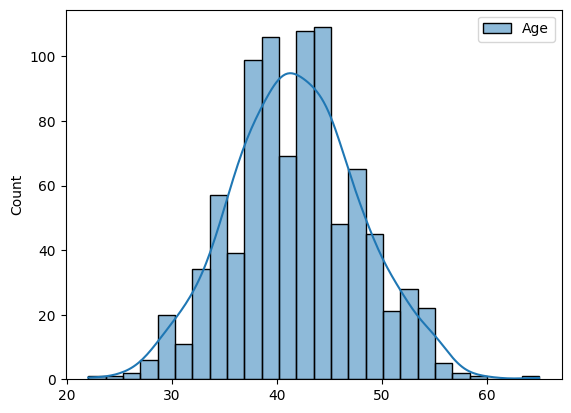

In [24]:
# df.groupBy('Age').count().show()
sns.histplot(df.select('Age').toPandas(), kde= True)
plt.show()

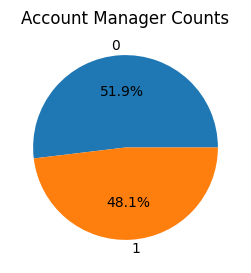

In [37]:
counts = df.groupBy('Account_Manager').count().toPandas()

plt.figure(figsize=(5,3))
# create a pie chart using PySpark and Matplotlib
counts_dict = dict(counts.values)
labels = [0, 1]
sizes = [counts_dict[label] for label in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Account Manager Counts')
# display the plot
plt.show()

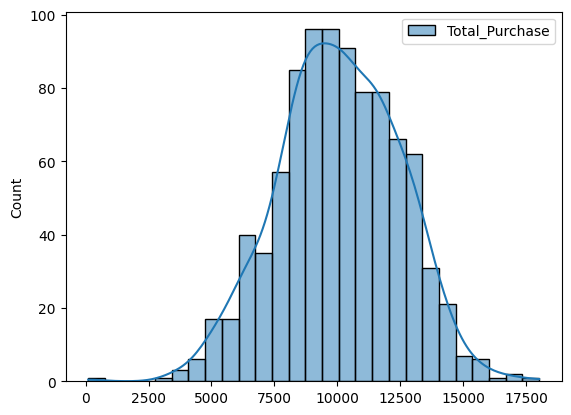

In [39]:
# df.groupBy('Total_Purchase').count().show()
sns.histplot(df.select('Total_Purchase').toPandas(), kde= True)
plt.show()

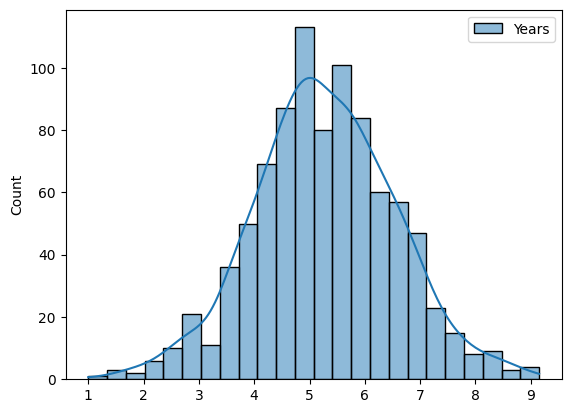

In [41]:
# df.groupBy('Years').count().show()
sns.histplot(df.select('Years').toPandas(), kde= True)
plt.show()

+---------+-----+
|Num_Sites|count|
+---------+-----+
|      8.0|  213|
|      7.0|  146|
|      4.0|    4|
|     11.0|   83|
|     14.0|    6|
|      3.0|    2|
|     10.0|  131|
|     13.0|    8|
|      6.0|   67|
|      5.0|   22|
|      9.0|  186|
|     12.0|   32|
+---------+-----+



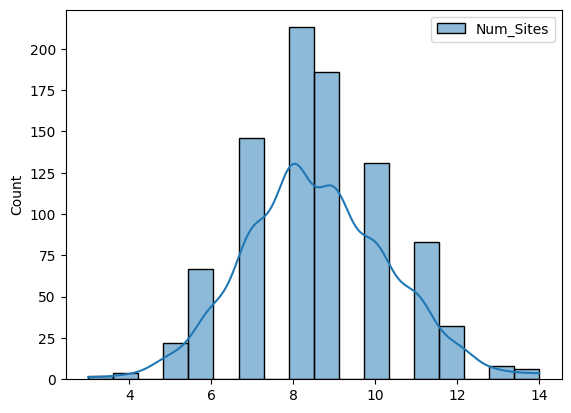

In [63]:
df.groupBy('Num_Sites').count().show()
sns.histplot(df.select('Num_Sites').toPandas(), kde= True)
plt.show()

In [42]:
df.select(['Onboard_date', 'Churn']).show()

+-------------------+-----+
|       Onboard_date|Churn|
+-------------------+-----+
|2013-08-30 07:00:40|    1|
|2013-08-13 00:38:46|    1|
|2016-06-29 06:20:07|    1|
|2014-04-22 12:43:12|    1|
|2016-01-19 15:31:15|    1|
|2009-03-03 23:13:37|    1|
|2016-12-05 03:35:43|    1|
|2006-03-09 14:50:20|    1|
|2011-09-29 05:47:23|    1|
|2006-03-28 15:42:45|    1|
|2016-11-13 13:13:01|    1|
|2015-05-28 12:14:03|    1|
|2011-02-16 08:10:47|    1|
|2012-11-22 05:35:03|    1|
|2015-03-28 02:13:44|    1|
|2015-07-22 08:38:40|    1|
|2006-09-03 06:13:55|    1|
|2006-10-22 04:42:38|    1|
|2015-10-07 00:27:10|    1|
|2014-11-06 23:47:14|    1|
+-------------------+-----+
only showing top 20 rows



Creating a new column called 'Year_onboard'

+------------+-----+
|Year_onboard|count|
+------------+-----+
|        2007|   90|
|        2015|   75|
|        2006|  102|
|        2013|   80|
|        2014|  103|
|        2012|   67|
|        2009|   84|
|        2016|   67|
|        2010|   84|
|        2011|   72|
|        2008|   76|
+------------+-----+



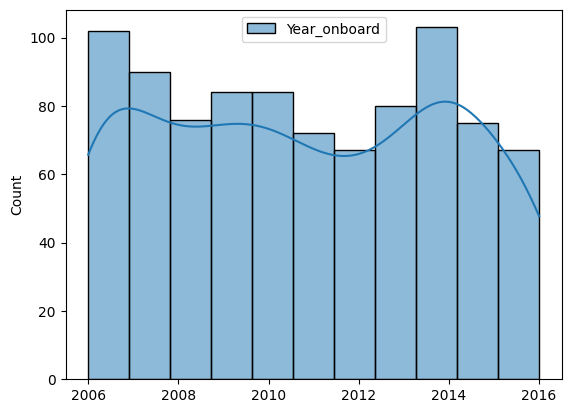

In [50]:
from pyspark.sql.functions import year

df = df.withColumn('Year_onboard', year('Onboard_date'))
df.groupBy('Year_onboard').count().show()
sns.histplot(df.select('Year_onboard').toPandas(), kde= True)
plt.show()

In [53]:
df.groupBy('Location').count().show(truncate=False)

+---------------------------------------------------------------+-----+
|Location                                                       |count|
+---------------------------------------------------------------+-----+
|062 Trevor Falls Suite 665 North Mathewchester, MH 93744       |1    |
|066 Jenkins Walks Barbaramouth, LA 76409                       |1    |
|45946 Day Springs Mendozastad, NJ 46404                        |1    |
|143 Andrea Flat Lake Michael, ID 33149                         |1    |
|Unit 2093 Box 1530 DPO AA 53596-7800                           |1    |
|399 Herbert Key Port Thomas, PR 14265                          |1    |
|104 Ruben Rapid Apt. 107 New Andrea, FM 58602                  |1    |
|930 Carrie Harbor Suite 044 New Adamtown, MP 74903             |1    |
|8202 Jade Unions Suite 557 South Wesley, MS 12025              |1    |
|USCGC Bailey FPO AA 06202-5064                                 |1    |
|893 Carla Trace Suite 132 Lake Aliciaport, AR 87567            

In [46]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Year_onboard: integer (nullable = true)



In [62]:
df.columns

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn',
 'Year_onboard']

In [61]:
from pyspark.ml.feature import VectorAssembler

In [65]:
assembler = VectorAssembler(inputCols = ['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Year_onboard'], outputCol = 'features')

In [66]:
out = assembler.transform(df)

In [68]:
final_data = out.select(['features', 'Churn'])
final_data.show(truncate = False)

+------------------------------------+-----+
|features                            |Churn|
+------------------------------------+-----+
|[42.0,11066.8,0.0,7.22,8.0,2013.0]  |1    |
|[41.0,11916.22,0.0,6.5,11.0,2013.0] |1    |
|[38.0,12884.75,0.0,6.67,12.0,2016.0]|1    |
|[42.0,8010.76,0.0,6.71,10.0,2014.0] |1    |
|[37.0,9191.58,0.0,5.56,9.0,2016.0]  |1    |
|[48.0,10356.02,0.0,5.12,8.0,2009.0] |1    |
|[44.0,11331.58,1.0,5.23,11.0,2016.0]|1    |
|[32.0,9885.12,1.0,6.92,9.0,2006.0]  |1    |
|[43.0,14062.6,1.0,5.46,11.0,2011.0] |1    |
|[40.0,8066.94,1.0,7.11,11.0,2006.0] |1    |
|[30.0,11575.37,1.0,5.22,8.0,2016.0] |1    |
|[45.0,8771.02,1.0,6.64,11.0,2015.0] |1    |
|[45.0,8988.67,1.0,4.84,11.0,2011.0] |1    |
|[40.0,8283.32,1.0,5.1,13.0,2012.0]  |1    |
|[41.0,6569.87,1.0,4.3,11.0,2015.0]  |1    |
|[38.0,10494.82,1.0,6.81,12.0,2015.0]|1    |
|[45.0,8213.41,1.0,7.35,11.0,2006.0] |1    |
|[43.0,11226.88,0.0,8.08,12.0,2006.0]|1    |
|[53.0,5515.09,0.0,6.85,8.0,2015.0]  |1    |
|[46.0,804

Train Test Split

In [69]:
train_churn, test_churn = final_data.randomSplit([0.8,0.2])

Logistic Regression

In [70]:
from pyspark.ml.classification import LogisticRegression

In [73]:
log_churn = LogisticRegression(featuresCol = 'features', labelCol='Churn')

In [74]:
model = log_churn.fit(train_churn)

In [76]:
training_sum = model.summary

training_sum.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|              Churn|         prediction|
+-------+-------------------+-------------------+
|  count|                702|                702|
|   mean|0.16951566951566951|0.13105413105413105|
| stddev| 0.3754742798739226|0.33770015978907836|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



Evaluate Results

In [77]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [78]:
pred_churn = model.evaluate(test_churn)

In [79]:
pred_churn.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|Churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[28.0,9090.43,1.0...|    0|[1.32394041078268...|[0.78983654116389...|       0.0|
|[29.0,9617.59,0.0...|    0|[4.35250304549868...|[0.98728910042959...|       0.0|
|[30.0,10960.52,1....|    0|[2.46493733367597...|[0.92164694978000...|       0.0|
|[31.0,5304.6,0.0,...|    0|[3.34433380057007...|[0.96591879804030...|       0.0|
|[31.0,8688.21,0.0...|    0|[6.62262521871447...|[0.99867183138933...|       0.0|
|[32.0,6367.22,1.0...|    0|[2.61753180465835...|[0.93198140915628...|       0.0|
|[32.0,7896.65,0.0...|    0|[3.37697615046555...|[0.96697718292759...|       0.0|
|[32.0,8617.98,1.0...|    1|[1.03246952063136...|[0.73739438372635...|       0.0|
|[32.0,9472.72,1.0...|    0|[3.58706100947440...|[0.97306596139915...|       0.0|
|[32.0,9885.12,1

### Using AUC

In [80]:
churn_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='Churn')

In [81]:
auc = churn_eval.evaluate(pred_churn.predictions)

In [82]:
auc

0.7562294765308094

### Predict on brand new unlabeled data

We still need to evaluate the new_customers.csv file!

In [83]:
final_lr_model = log_churn.fit(final_data)

In [84]:
new_customers = spark.read.csv('/content/drive/MyDrive/Pyspark Practice/Python-and-Spark-for-Big-Data-master/Spark_for_Machine_Learning/Logistic_Regression/new_customers.csv',
                               inferSchema=True, header=True)

In [85]:
new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



In [86]:
new_customers = new_customers.withColumn('Year_onboard', year('Onboard_date'))

In [87]:
test_new_customers = assembler.transform(new_customers)

In [88]:
test_new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Year_onboard: integer (nullable = true)
 |-- features: vector (nullable = true)



In [89]:
final_results = final_lr_model.transform(test_new_customers)

In [90]:
final_results.select('Company','prediction').show()

+----------------+----------+
|         Company|prediction|
+----------------+----------+
|        King Ltd|       0.0|
|   Cannon-Benson|       1.0|
|Barron-Robertson|       1.0|
|   Sexton-Golden|       1.0|
|        Wood LLC|       0.0|
|   Parks-Robbins|       1.0|
+----------------+----------+



Ok! That is it! Now we know that we should assign Acocunt Managers to Cannon-Benson,Barron-Robertson,Sexton-GOlden, and Parks-Robbins!